# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering #


## Implement the intensity transformation  ##



(-0.5, 719.5, 809.5, -0.5)

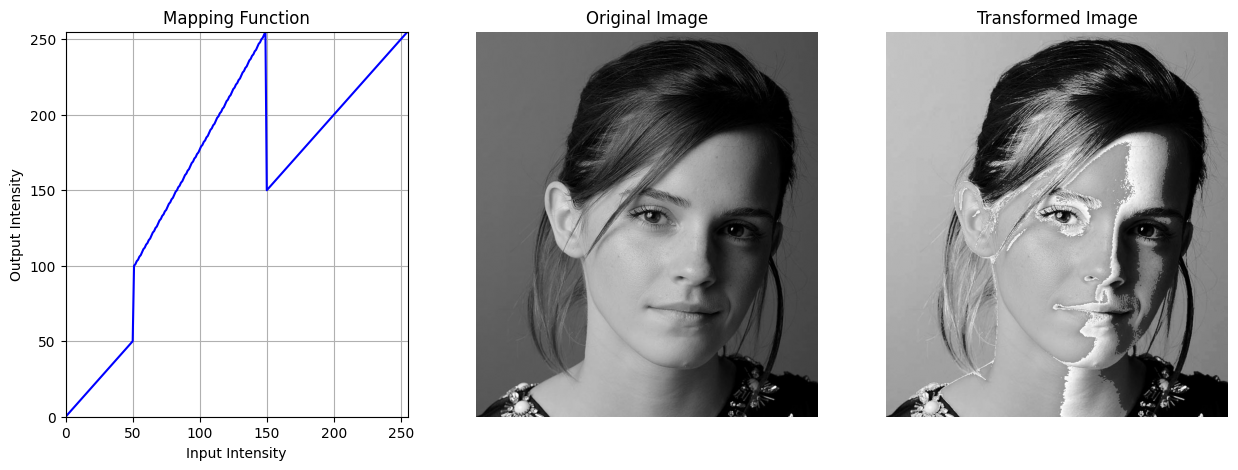

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define breakpoints and mappings
# Each tuple: (input_intensity, output_intensity)
control_points = np.array([
    (0, 0),
    (50, 50),
    (51, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], dtype=np.float32)

# Create LUT
LUT = np.zeros(256, dtype=np.uint8)

def linear_transform(c_point,lut ):
    for i in range(len(c_point) - 1):
        x1, y1 = control_points[i]
        x2, y2 = control_points[i + 1]
        slope = (y2 - y1) / (x2 - x1)
        for x in range(int(x1), int(x2) + 1):
            lut[x] = np.clip(slope * (x - x1) + y1, 0, 255)
    return lut
            
LUT = linear_transform(control_points, LUT)
# Read image in grayscale
img_orig = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(LUT, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(132)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

img_transformed = cv2.LUT(img_orig, LUT)
plt.subplot(133)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')


